In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import FastICA
from pandas import DataFrame, Series
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

%matplotlib inline
np.set_printoptions(precision=3 , suppress= True)

In [3]:
#importing the file and defining the columns I am going to work with:
filePath = './trie.txt'
columnsName = ['YYMMMDD', '_north(m)', 'sig_n(m)']
site = pd.read_csv(filePath, usecols = columnsName, delimiter = '\s+')
site

,YYMMMDD,_north(m),sig_n(m)
0,03FEB08,0.819894,0.000921
1,03FEB09,0.817884,0.000930
2,03FEB10,0.819661,0.000961
3,03FEB11,0.818301,0.000960
4,03FEB12,0.821052,0.000954
...,...,...,...
7302,23DEC19,1.190376,0.000824
7303,23DEC20,1.191578,0.000841
7304,23DEC21,1.189147,0.000876
7305,23DEC22,1.189226,0.000842


In [4]:
#changing the dtype of 'YYMMMDD':
site['YYMMMDD'] = pd.to_datetime(site['YYMMMDD'], format='%y%b%d')
site['YYMMMDD']

0      2003-02-08
1      2003-02-09
2      2003-02-10
3      2003-02-11
4      2003-02-12
          ...    
7302   2023-12-19
7303   2023-12-20
7304   2023-12-21
7305   2023-12-22
7306   2023-12-28
Name: YYMMMDD, Length: 7307, dtype: datetime64[ns]

In [5]:
#setting 'YYMMMDD' as index:
site.set_index('YYMMMDD', inplace = True)
site

,_north(m),sig_n(m)
YYMMMDD,,
2003-02-08,0.819894,0.000921
2003-02-09,0.817884,0.000930
2003-02-10,0.819661,0.000961
2003-02-11,0.818301,0.000960
2003-02-12,0.821052,0.000954
...,...,...
2023-12-19,1.190376,0.000824
2023-12-20,1.191578,0.000841
2023-12-21,1.189147,0.000876


In [6]:
#creating a new instance with a new period for the time series:
sitePeriodTime = site.loc['2010-06-12':'2020-06-13']
sitePeriodTime

,_north(m),sig_n(m)
YYMMMDD,,
2010-06-12,0.948150,0.000862
2010-06-13,0.947997,0.000909
2010-06-14,0.948873,0.000842
2010-06-15,0.948402,0.000865
2010-06-16,0.948479,0.000907
...,...,...
2020-06-09,1.127782,0.000860
2020-06-10,1.127484,0.000855
2020-06-11,1.127672,0.000850


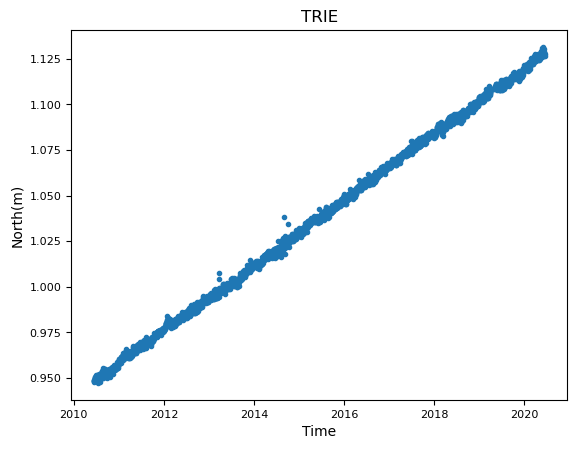

In [7]:
#checking the if the ts is stationarity for east:
plt.plot(sitePeriodTime.index, sitePeriodTime['_north(m)'], '.')
plt.title('TRIE')
plt.xlabel('Time')
plt.xticks(fontsize=8)
plt.ylabel('North(m)')
plt.yticks(fontsize=8)
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

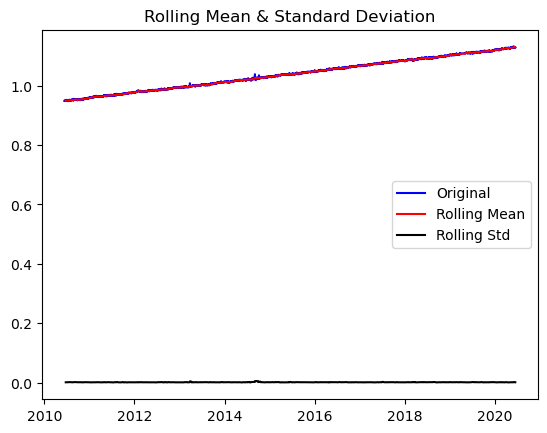

Results of Dickey-Fuller Test:
Test Statistic                    0.285145
p-value                           0.976653
#Lags Used                       18.000000
Number of Observations Used    3498.000000
Critical Value (1%)              -3.432221
Critical Value (5%)              -2.862367
Critical Value (10%)             -2.567210
dtype: float64


In [9]:
test_stationarity(sitePeriodTime['_north(m)'])

In [10]:
tsLogN = np.log1p(sitePeriodTime['_north(m)'])
tsLogN

YYMMMDD
2010-06-12    0.666880
2010-06-13    0.666802
2010-06-14    0.667251
2010-06-15    0.667010
2010-06-16    0.667049
                ...   
2020-06-09    0.755080
2020-06-10    0.754940
2020-06-11    0.755028
2020-06-12    0.754569
2020-06-13    0.755067
Name: _north(m), Length: 3517, dtype: float64

In [11]:
tsLogN_df = pd.DataFrame(tsLogN, index=tsLogN.index)
tsLogN_df

,_north(m)
YYMMMDD,
2010-06-12,0.666880
2010-06-13,0.666802
2010-06-14,0.667251
2010-06-15,0.667010
2010-06-16,0.667049
...,...
2020-06-09,0.755080
2020-06-10,0.754940
2020-06-11,0.755028


In [12]:
tsLogDiffN = tsLogN - tsLogN.shift()
tsLogDiffN

YYMMMDD
2010-06-12         NaN
2010-06-13   -0.000079
2010-06-14    0.000450
2010-06-15   -0.000242
2010-06-16    0.000040
                ...   
2020-06-09   -0.000408
2020-06-10   -0.000140
2020-06-11    0.000088
2020-06-12   -0.000459
2020-06-13    0.000498
Name: _north(m), Length: 3517, dtype: float64

In [13]:
tsLogDiffN.fillna(tsLogDiffN.mean(), inplace = True)
tsLogDiffN

YYMMMDD
2010-06-12    0.000025
2010-06-13   -0.000079
2010-06-14    0.000450
2010-06-15   -0.000242
2010-06-16    0.000040
                ...   
2020-06-09   -0.000408
2020-06-10   -0.000140
2020-06-11    0.000088
2020-06-12   -0.000459
2020-06-13    0.000498
Name: _north(m), Length: 3517, dtype: float64

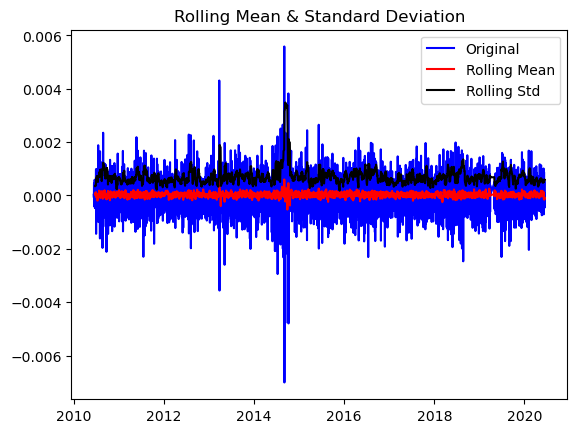

Results of Dickey-Fuller Test:
Test Statistic                  -20.937241
p-value                           0.000000
#Lags Used                       17.000000
Number of Observations Used    3499.000000
Critical Value (1%)              -3.432220
Critical Value (5%)              -2.862366
Critical Value (10%)             -2.567210
dtype: float64


In [14]:
test_stationarity(tsLogDiffN)

In [15]:
tsLogDiffN_df = pd.DataFrame(tsLogDiffN, index=tsLogDiffN.index)
tsLogDiffN_df

,_north(m)
YYMMMDD,
2010-06-12,0.000025
2010-06-13,-0.000079
2010-06-14,0.000450
2010-06-15,-0.000242
2010-06-16,0.000040
...,...
2020-06-09,-0.000408
2020-06-10,-0.000140
2020-06-11,0.000088


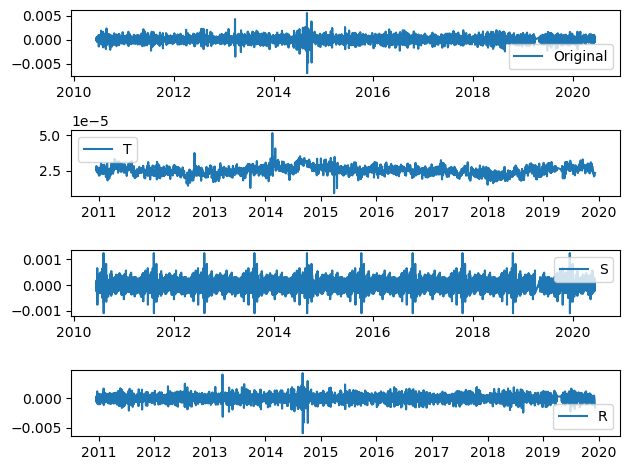

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

#data frame before checking the outliers
decompositionN = seasonal_decompose(tsLogDiffN_df, period=365)
trendN = decompositionN.trend
seasonalN = decompositionN.seasonal
residualN = decompositionN.resid

plt.subplot(411) 
plt.plot(tsLogDiffN_df, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trendN, label='T') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonalN,label='S') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residualN, label='R') 
plt.legend(loc='best') 
plt.tight_layout()

In [17]:
limiarZ = 1.0
tsLogDiffN_noOut = tsLogDiffN_df[(np.abs(tsLogDiffN_df-tsLogDiffN_df.mean()) 
                                              < limiarZ*tsLogDiffN_df.std())]

In [18]:
#making a copy of the data 
tsLogDiffN_noOut2= tsLogDiffN_noOut

#replacing the missing values for the mean
tsLogDiffN_noOut2.fillna(tsLogDiffN_noOut2.mean(), inplace = True)

#removing the rows with missing values
tsLogDiffN_noOut.dropna(inplace=True)

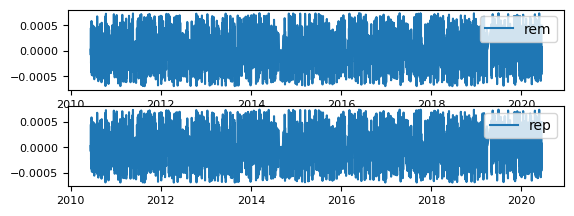

In [19]:
plt.subplot(411) 
plt.plot(tsLogDiffN_noOut, label='rem')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(tsLogDiffN_noOut2, label='rep') 
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='best') 

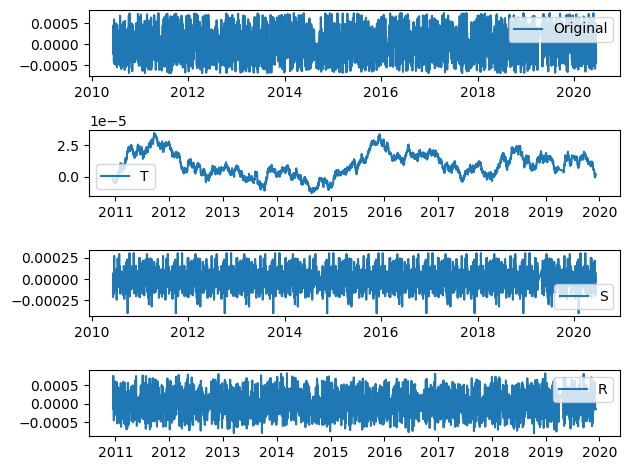

In [20]:
#data frame with outliers removed (770 rows)
decompositionN_outRem = seasonal_decompose(tsLogDiffN_noOut, period=365)
trendN_outRem = decompositionN_outRem.trend
seasonalN_outRem = decompositionN_outRem.seasonal
residualN_outRem = decompositionN_outRem.resid

plt.subplot(411) 
plt.plot(tsLogDiffN_noOut, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trendN_outRem, label='T') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonalN_outRem,label='S') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residualN_outRem, label='R') 
plt.legend(loc='best') 
plt.tight_layout()

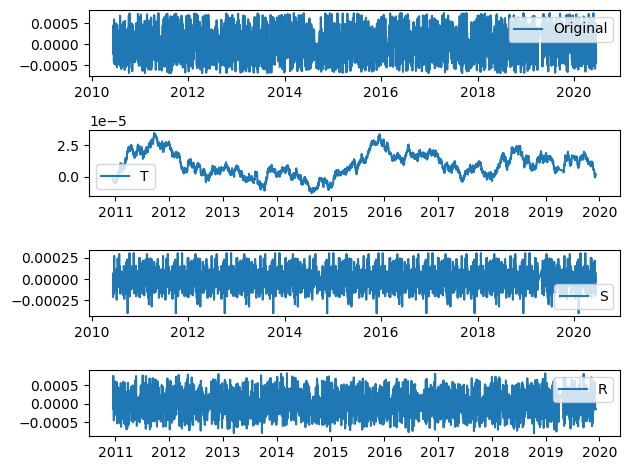

In [21]:
#data frame with outliers replaced (1086 rows)
decompositionN_outRep = seasonal_decompose(tsLogDiffN_noOut2, period=365)
trendN_outRep = decompositionN_outRep.trend
seasonalN_outRep = decompositionN_outRep.seasonal
residualN_outRep = decompositionN_outRep.resid

plt.subplot(411) 
plt.plot(tsLogDiffN_noOut2, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trendN_outRep, label='T') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonalN_outRep,label='S') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residualN_outRep, label='R') 
plt.legend(loc='best') 
plt.tight_layout()

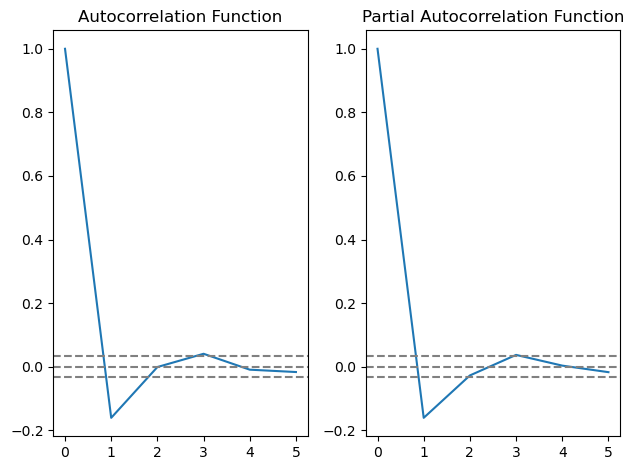

In [22]:
#ACF and PACF plots - rolling mean:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(tsLogDiffN_noOut, nlags=5)
lag_pacf = pacf(tsLogDiffN_noOut, nlags=5, method='ols')

#Plot ACF (q -> model MA): 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsLogDiffN_noOut)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsLogDiffN_noOut)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF (p -> model AR): 
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tsLogDiffN_noOut)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tsLogDiffN_noOut)),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.tight_layout()

In [25]:
#converting the index to datetime
tsLogDiffN_df.index = pd.to_datetime(tsLogDiffN_df.index)
tsLogDiffN_noOut2.index = pd.to_datetime(tsLogDiffN_noOut2.index)
tsLogDiffN_noOut.index = pd.to_datetime(tsLogDiffN_noOut.index)
tsLogN_df.index = pd.to_datetime(tsLogN_df.index)

#making sure that the index is in order
tsLogDiffN_df.sort_index(inplace=True)
tsLogDiffN_noOut2.sort_index(inplace=True)
tsLogDiffN_noOut.sort_index(inplace=True)
tsLogN_df.sort_index(inplace=True)

#setting the frequency as daily
tsLogDiffN_df = tsLogDiffN_df.asfreq('D')
tsLogDiffN_noOut2 = tsLogDiffN_noOut2.asfreq('D')
tsLogDiffN_noOut = tsLogDiffN_noOut.asfreq('D')
tsLogN_df = tsLogN_df.asfreq('D')

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
tsLogDiffN_df.rename(columns={'_north(m)':'north(m)'}, inplace=True)

/Users/rafaelaoliveira/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


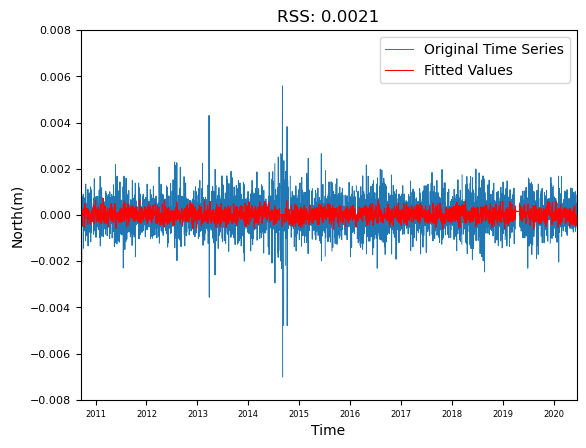

In [55]:
#model AR (Auto-Regressive) -> Plot PACF (p = 1)
modelN_AR = ARIMA(tsLogDiffN_noOut, order=(1, 1, 0))  
resultsN_AR = modelN_AR.fit()
plt.plot(tsLogDiffN_df,  label='Original Time Series', linewidth = 0.7)
plt.plot(resultsN_AR.fittedvalues, color='red', label='Fitted Values', linewidth= 0.8)

# Calculate Residual Sum of Squares (RSS)
residuals_AR = resultsN_AR.fittedvalues - tsLogDiffN_df['north(m)']
rss_AR = np.sum(residuals_AR**2, axis=0)

#Ensure rss is a scalar (float)
#rss_scalar = float(rss.iloc[0]) 

# Show the plot
plt.title(f'RSS: {rss_AR:.4f}')
plt.legend()
plt.xlabel('Time')
plt.xticks(fontsize=6)
plt.xlim(pd.Timestamp('2010-09-15'), pd.Timestamp('2020-06-13'))
plt.ylabel('North(m)')
plt.ylim(-0.008,0.008)
plt.yticks(fontsize=8)
plt.show()

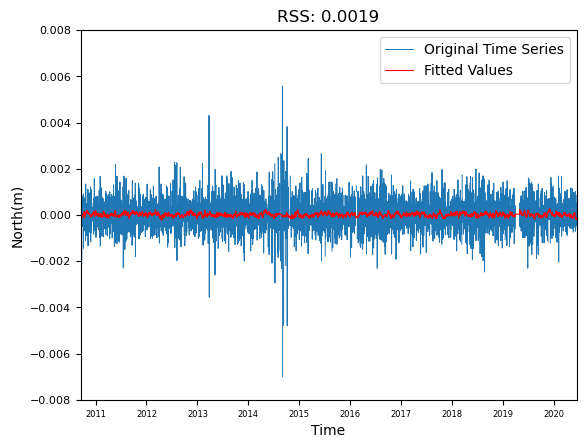

In [54]:
#model MA (Moving Averages) -> Plot ACF (q = 1)
model_MA = ARIMA(tsLogDiffN_noOut, order=(0, 1, 1))  
results_MA = model_MA.fit()  
plt.plot(tsLogDiffN_df, label='Original Time Series', linewidth = 0.7)
plt.plot(results_MA.fittedvalues, color='red', label='Fitted Values', linewidth= 0.8)

# Calculate Residual Sum of Squares (RSS)
residuals_MA = results_MA.fittedvalues - tsLogDiffN_df['north(m)']
rss_MA = np.sum(residuals_MA**2, axis=0)


plt.title(f'RSS: {rss_MA:.4f}')
plt.legend()
plt.xlabel('Time')
plt.xticks(fontsize=6)
plt.xlim(pd.Timestamp('2010-09-15'), pd.Timestamp('2020-06-13'))
plt.ylabel('North(m)')
plt.ylim(-0.008,0.008)
plt.yticks(fontsize=8)
plt.show()

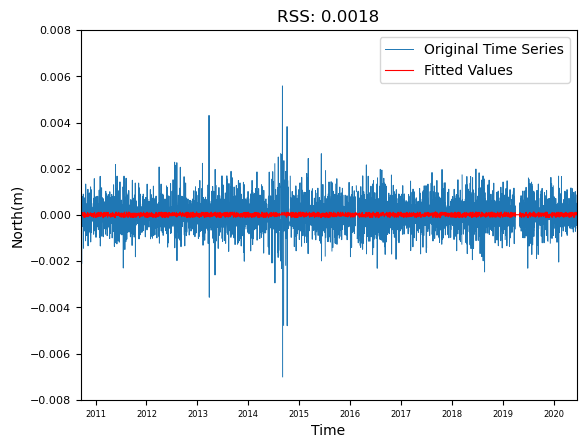

In [53]:
#combined - model ARIMA  p = 1 and q = 1:
#Auto-Regressive Integrated Moving Averages
model_ARIMA = ARIMA(tsLogDiffN_noOut, order=(1, 0, 1))  
results_ARIMA = model_ARIMA.fit()  
plt.plot(tsLogDiffN_df, label='Original Time Series', linewidth = 0.7)
plt.plot(results_ARIMA.fittedvalues,color='red', label='Fitted Values', linewidth= 0.8)


# Calculate Residual Sum of Squares (RSS)
residuals_ARIMA = results_ARIMA.fittedvalues - tsLogDiffN_df['north(m)']
rss_ARIMA = np.sum(residuals_ARIMA**2, axis=0)


plt.title(f'RSS: {rss_ARIMA:.4f}')
plt.legend()
plt.xlabel('Time')
plt.xticks(fontsize=6)
plt.xlim(pd.Timestamp('2010-09-15'), pd.Timestamp('2020-06-13'))
plt.ylabel('North(m)')
plt.ylim(-0.008,0.008)
plt.yticks(fontsize=8)
plt.show()

In [52]:
#ARIMA for outlier replaced
model_ARIMA_outDel = ARIMA(tsLogDiffN_noOut2, order=(1, 0, 1))
results_ARIMA_outDel = model_ARIMA_outDel.fit() 

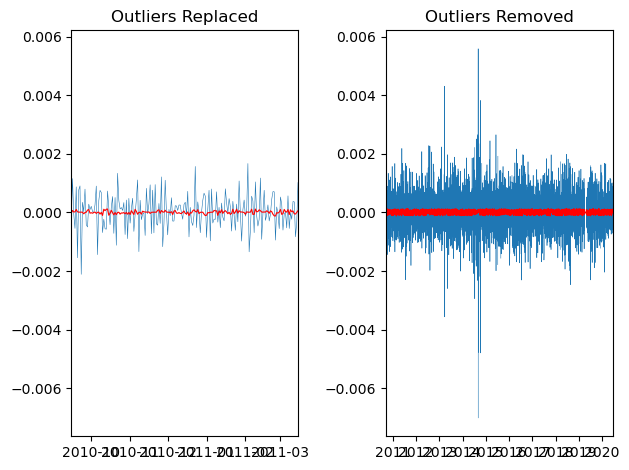

In [57]:
#Plot rep: 
plt.subplot(121) 
plt.plot(tsLogDiffN_df, label='Original Time Series', linewidth = 0.4)
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values', linewidth= 0.8)
plt.xlim(pd.Timestamp('2010-09-15'), pd.Timestamp('2011-03-15'))
plt.title('Outliers Replaced')

#Plot del: 
plt.subplot(122)
plt.plot(tsLogDiffN_df, label='Original Time Series', linewidth = 0.4)
plt.plot(results_ARIMA_outDel.fittedvalues, color='red', label='Fitted Values', linewidth= 0.8)
plt.xlim(pd.Timestamp('2010-09-15'), pd.Timestamp('2020-06-13'))
plt.title('Outliers Removed')
plt.tight_layout()